In [1]:
# importando pacotes utilizados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as re
import time
import plotly.express as px

### Extração de dados a partir da API da NBA

In [8]:
#estrutura inicial dos dados
url_nba = f'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2021-22&SeasonType=Regular%20Season&StatCategory=PTS' # url da api com f-string para iterar listas
dados = re.get(url=url_nba).json() # fazendo request do json

colunas_iniciais = ['YEAR', 'SEASON'] + dados['resultSet']['headers'] # estrutura inicial do dataframe

df_final = pd.DataFrame(columns=colunas_iniciais) # iniciando o dataframe

# parametros api
tipo_season = ['Regular%20Season', 'Playoffs'] # tipo de temporada
# '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21','2021-22',
year = ['2022-23'] # ano da temporada

for y in year: # iterando lista de anos de temporada
    for t in tipo_season: # iterando tipos de temporada playoff ou regular
        url_nba = f'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season={y}&SeasonType={t}&StatCategory=PTS' # url da api com f-string para iterar listas
        dados = re.get(url=url_nba).json() # fazendo request do json
        df1 = pd.DataFrame(dados['resultSet']['rowSet'], columns=dados['resultSet']['headers']) # request da informacao selecionada na api anteriormente
        df2 = pd.DataFrame({'YEAR':[y for i in range(len(df1))], # aplicando o ano e a temporada para cada linha 
                            'SEASON':[t for i in range(len(df1))]})
        df3 = pd.concat([df2, df1], axis=1) # concatenando em um dataframe ajustado
        df_final = pd.concat([df_final, df3], axis = 0) # empilhando as bases
        print(f'Dados obtidos: ano - {y}, temporada - {t}')
        #time.sleep(np.random.uniform(low=5, high = 10))
        
print ('Executado')


C:\Users\lpogg\AppData\Local\Temp\ipykernel_6976\317943669.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_final, df3], axis = 0) # empilhando as bases


Dados obtidos: ano - 2022-23, temporada - Regular%20Season
Dados obtidos: ano - 2022-23, temporada - Playoffs
Executado


## Glossary
* GP - Games Played
* MIN - Minutes Played
* PTS - Points
* FGM - Field Goals Made
* FGA - Field Goals Attempted
* FG% - Field Goal Percentage
* 3PM - 3 Point Field Goals Made
* 3PA - 3 Point Field Goals Attempted
* 3P% - 3 Point Field Goal Percentage
* FTM - Free Throws Made
* FTA - Free Throws Attempted
* FT% - Free Throw Percentage
* OREB - Offensive Rebounds
* DREB - Defensive Rebounds
* REB - Rebounds
* AST - Assists
* STL - Steals
* BLK - Blocks
* TOV - Turnovers

In [94]:
# visao inicial do data set

df_final.head()

,YEAR,SEASON,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2022-23,Regular_Season,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,2022-23,Regular_Season,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,2022-23,Regular_Season,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,2022-23,Regular_Season,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,2022-23,Regular_Season,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,...,742,359,52,51,246,197,1959,2072,1.46,0.21


In [24]:
df_final['SEASON'].replace('Regular%20Season', 'Regular_Season', inplace = True)

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 216
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       756 non-null    object 
 1   SEASON     756 non-null    object 
 2   PLAYER_ID  756 non-null    object 
 3   RANK       756 non-null    object 
 4   PLAYER     756 non-null    object 
 5   TEAM_ID    756 non-null    object 
 6   TEAM       756 non-null    object 
 7   GP         756 non-null    object 
 8   MIN        756 non-null    object 
 9   FGM        756 non-null    object 
 10  FGA        756 non-null    object 
 11  FG_PCT     756 non-null    float64
 12  FG3M       756 non-null    object 
 13  FG3A       756 non-null    object 
 14  FG3_PCT    756 non-null    float64
 15  FTM        756 non-null    object 
 16  FTA        756 non-null    object 
 17  FT_PCT     756 non-null    float64
 18  OREB       756 non-null    object 
 19  DREB       756 non-null    object 
 20  REB        756 

### Comparando os pontos da temporada regular do Celtics

In [52]:
# 1610612738 - Celtics
tbl_celtics = df_final[df_final['TEAM_ID'] == 1610612738]

In [96]:
pontos_celtics = tbl_celtics.query('SEASON == "Regular_Season"').groupby('PLAYER')['PTS'].sum().sort_values(ascending=False).reset_index()
pontos_celtics

,PLAYER,PTS
0,Jayson Tatum,2225
1,Jaylen Brown,1784
2,Derrick White,1017
3,Malcolm Brogdon,1000
4,Marcus Smart,703
5,Grant Williams,641
6,Al Horford,616
7,Sam Hauser,512
8,Mike Muscala,383
9,Robert Williams III,279


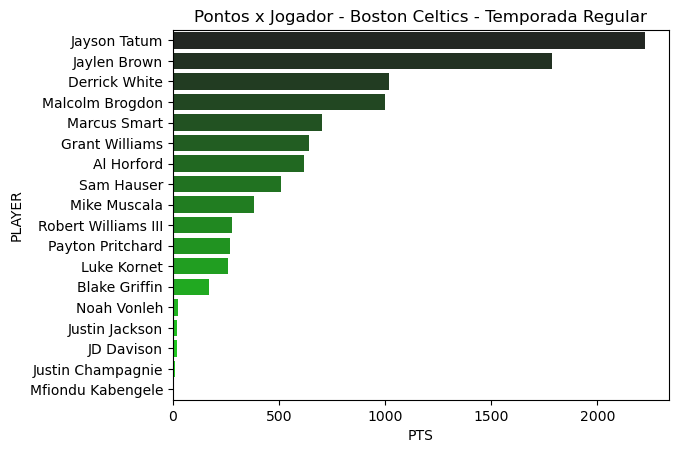

In [97]:
ax = sns.barplot(data = pontos_celtics,
            x = 'PTS',
            y = 'PLAYER',
            palette = "dark:#00FF00")

ax.set_title('Pontos x Jogador - Boston Celtics - Temporada Regular')

plt.show()

In [103]:
pontos_medio_time_regular = df_final.query('SEASON == "Regular_Season"').groupby('TEAM')['PTS'].mean().sort_values(ascending=False).reset_index()
pontos_medio_time_regular

,TEAM,PTS
0,NYK,639.0625
1,DEN,623.0
2,LAC,608.555556
3,PHX,600.0
4,NOP,598.6875
5,ATL,590.277778
6,LAL,582.888889
7,OKC,579.625
8,GSW,568.764706
9,PHI,559.888889


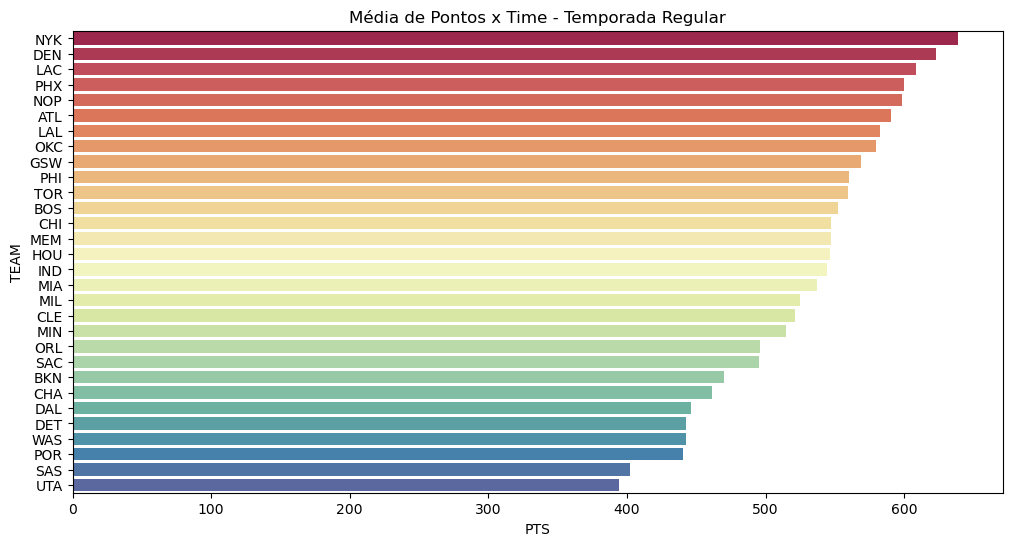

In [111]:
ax = sns.barplot(data = pontos_medio_time_regular,
            x = 'PTS',
            y = 'TEAM',
            palette = 'Spectral')

ax.set_title('Média de Pontos x Time - Temporada Regular')
ax.figure.set_size_inches(12,6)

plt.show()

### Utilizando formula de Sturges para agrupar jogadores por pontos

In [115]:
n = df_final.shape[0]

k = 1 + (10 /3) * np.log10(n)

int(k)

10

### Calculando a distribuição dos de pontos

Entender o que são os jogadores com -2 pontos

In [120]:
frequencia = df_final.value_counts(
  pd.cut(
    x = df_final['PTS'],
    bins = int(k),
    include_lowest = True
  ),
  sort = False
)

frequencia

PTS
(-2.226, 222.5]     392
(222.5, 445.0]      113
(445.0, 667.5]       82
(667.5, 890.0]       58
(890.0, 1112.5]      30
(1112.5, 1335.0]     36
(1335.0, 1557.5]     19
(1557.5, 1780.0]     12
(1780.0, 2002.5]     10
(2002.5, 2225.0]      4
Name: count, dtype: int64

In [131]:
percentual = df_final.value_counts(
  pd.cut(
    x = df_final.query('SEASON == "Regular_Season"')['PTS'],
    bins = int(k),
    include_lowest = True
  ),
  sort = False,
  normalize = True
)

percentual

PTS
(-2.226, 222.5]     0.263228
(222.5, 445.0]      0.124339
(445.0, 667.5]      0.165344
(667.5, 890.0]      0.153439
(890.0, 1112.5]     0.079365
(1112.5, 1335.0]    0.095238
(1335.0, 1557.5]    0.050265
(1557.5, 1780.0]    0.031746
(1780.0, 2002.5]    0.026455
(2002.5, 2225.0]    0.010582
Name: proportion, dtype: float64

In [132]:
distribuicao_pontos = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
distribuicao_pontos.reset_index(inplace=True)

c:\Users\lpogg\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


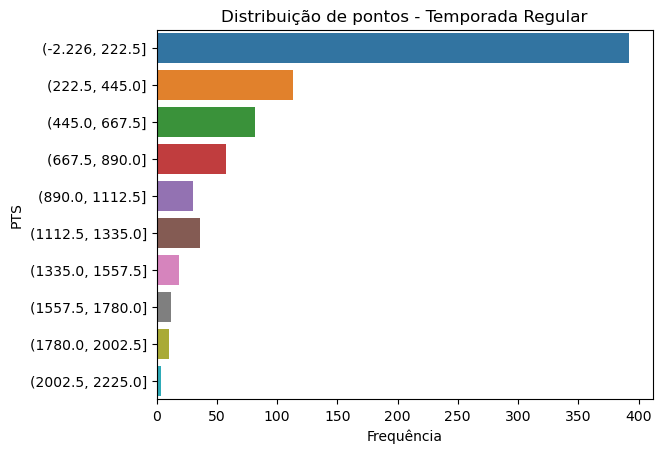

In [133]:
ax = sns.barplot(data = distribuicao_pontos,
                 y = 'PTS',
                 x = 'Frequência')

ax.set_title('Distribuição de pontos - Temporada Regular')
plt.show()

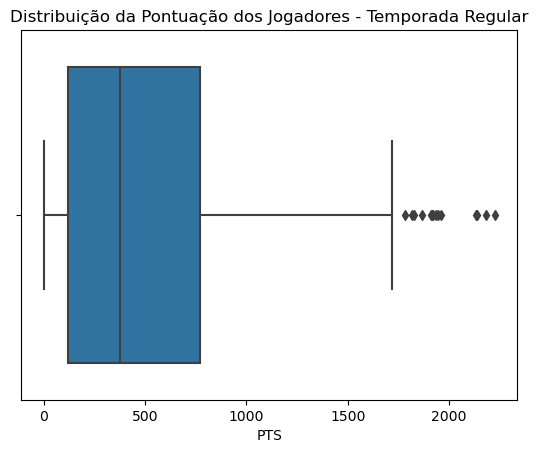

In [138]:
ax = sns.boxplot(data = df_final.query('SEASON == "Regular_Season"'),
                 x = 'PTS')

ax.set_title('Distribuição da Pontuação dos Jogadores - Temporada Regular')
plt.show()